In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
%matplotlib inline

In [145]:
text = np.genfromtxt('MIC_results.txt',delimiter='/n',dtype='float')
selection = []
selectIndex = 0.2
value = []

for i in range(0,839):
    if text[i] > selectIndex:
        selection.append(i)
        value.append(text[i])
print(selection)
print(value)

[3, 4, 21, 22, 25, 26, 29, 33, 34, 37, 39, 42, 45, 313, 460, 589, 600, 608, 826, 827, 828]
[0.209046706838, 0.20617031973399999, 0.205602222833, 0.205602222833, 0.21419561692899999, 0.21419561692899999, 0.234002367436, 0.24408655787299999, 0.24221410206399999, 0.24221410206399999, 0.24221410206399999, 0.24221410206399999, 0.24221410206399999, 0.21419561692899999, 0.246996104572, 0.22095263127100001, 0.22095263127100001, 0.20401142431899999, 0.26846280646999998, 0.26681267935399999, 0.24595428578799999]


In [146]:
csv = open('recs2009_public.csv','rb')
data = pd.read_csv(csv)
csv.close()
data = data.drop(['DOEID'],axis=1)
data.head()

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,2,4,12,2,2471.679705,4742,1080,4953,1271,4,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,4,10,26,2,8599.172010,2662,199,2688,143,5,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,1,1,1,5,8969.915921,6233,505,5741,829,1,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,2,3,7,2,18003.639600,6034,672,5781,868,1,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,1,1,1,3,5999.605242,5388,702,5313,797,1,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [147]:
data[data.columns[906]]
data.columns[906]

'TOTALBTU'

0.999932251406


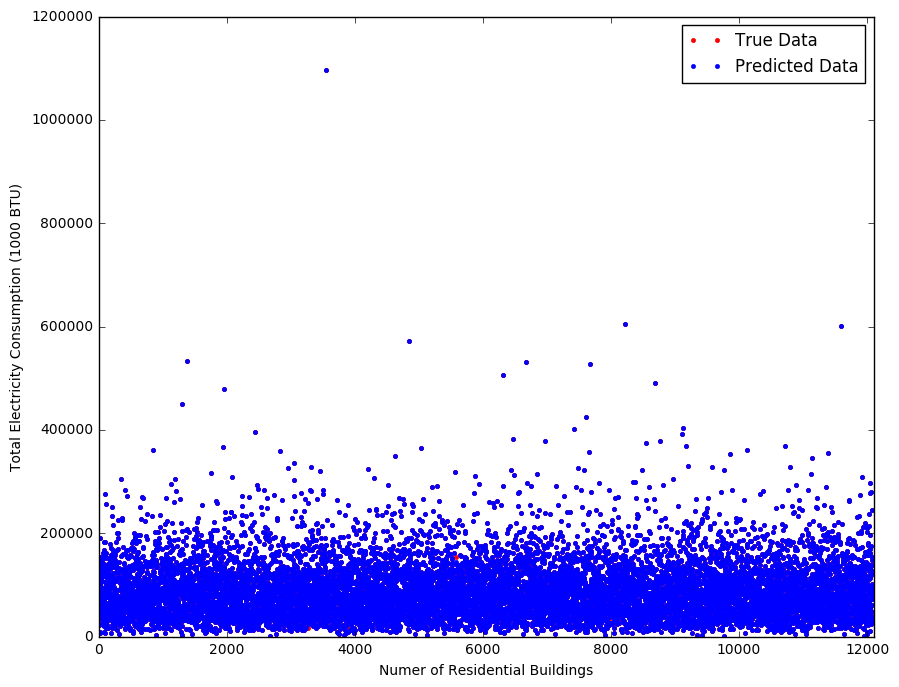

In [148]:
#### SelectIndex = 0.20, select by computer ########

new = pd.DataFrame()
Y = data[data.columns[906]]
Y = pd.DataFrame(Y)
for i in selection:
    new[data.columns[i]] = data[data.columns[i]]
X = new
reg1 = tree.DecisionTreeRegressor()
reg1.fit(X,Y)
print(reg1.score(X,Y))

fig1 = plt.figure(figsize=(10,8))
plt.plot(Y,'.',c='r',label='True Data')
plt.xlim(0,12100)
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Numer of Residential Buildings')
plt.plot(reg1.predict(X),'.',c='b',label='Predicted Data')
plt.legend()
plt.savefig('books_read.png')

[ 0.29036773  0.39202908  0.37182026  0.33236584  0.42443807  0.31279686
  0.39862753  0.38248166  0.32020073  0.31118168]
0.353630944166


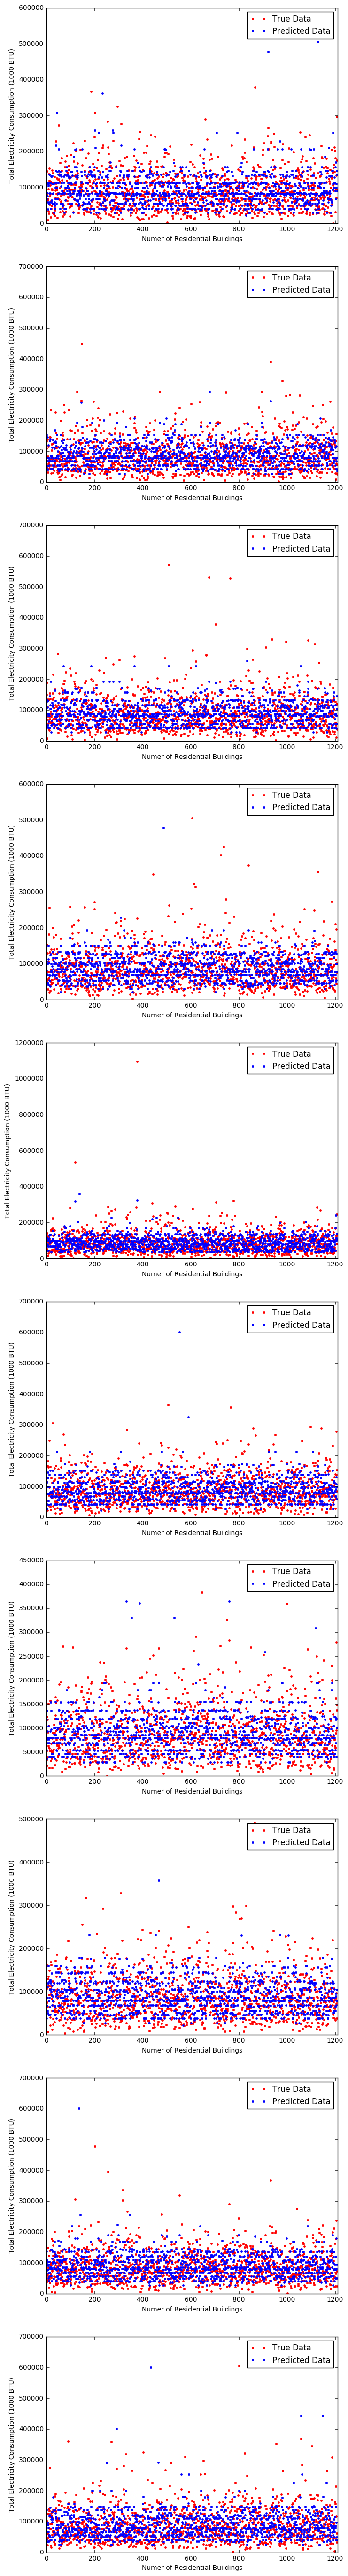

In [149]:
X1 = X.as_matrix()
Y1 = Y.as_matrix()

kf = KFold(n_splits=10,shuffle=True,random_state=True)
sum1 = []
i = 0
fig = plt.figure(figsize=(8,70))
for train, test in kf.split(X1):
    X_train = X1[train]
    X_test = X1[test]
    Y_train = Y1[train]
    Y_test = Y1[test]
    regr_1 = DecisionTreeRegressor(max_depth=7)
    regr_1.fit(X_train, Y_train)
    sum1.append(regr_1.score(X_test,Y_test))
    plt.subplot(10,1,i+1)
    plt.plot(Y_test,'.',c='r',label='True Data')
    plt.plot(regr_1.predict(X_test),'.',c='b',label='Predicted Data')
    plt.xlim(0,1210)
    plt.ylabel('Total Electricity Consumption (1000 BTU)')
    plt.xlabel('Numer of Residential Buildings')
    plt.legend()
    plt.savefig(str(i)+'.png')
    i = i+1
sum1 = np.array(sum1)
print(sum1)
print(sum1.mean())

0.954232225921


(0, 12100)

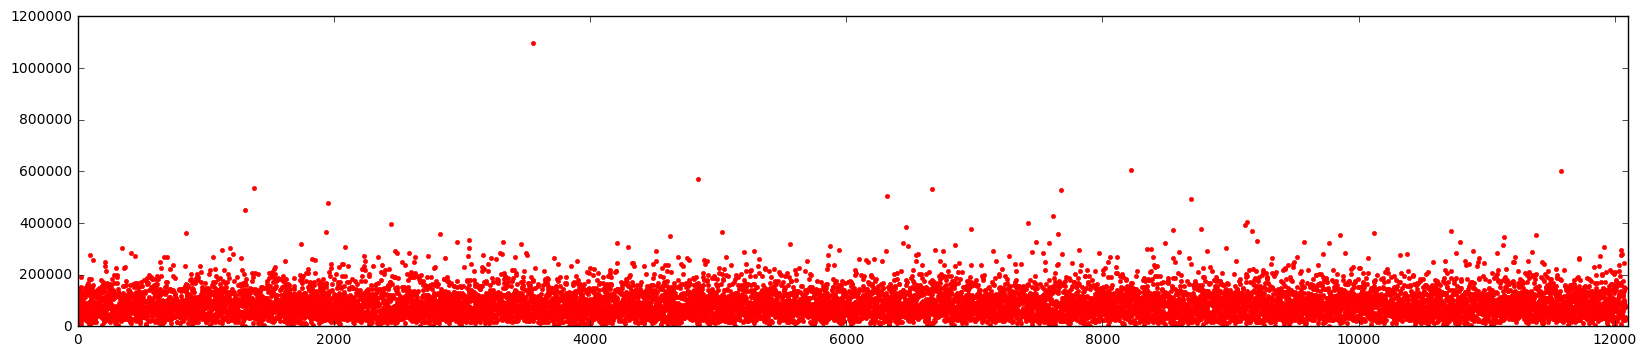

In [150]:
###### SelectIndex = 0.24 ########
selection1 = []
selectIndex = 0.24
for i in range(0,839):
    if text[i] > selectIndex:
        selection1.append(i)

new = pd.DataFrame()
Y = data[data.columns[906]]
Y = pd.DataFrame(Y)
for i in selection1:
    new[data.columns[i]] = data[data.columns[i]]
X = new
reg1 = tree.DecisionTreeRegressor()
reg1.fit(X,Y)
print(reg1.score(X,Y))

fig1 = plt.figure(figsize=(20,4))
plt.plot(Y,'.',c='r')
plt.xlim(0,12100)

[ 0.34231338  0.27263038  0.38287027  0.40756511  0.25278089  0.42463847
  0.37635837  0.39572472  0.34888857  0.2696346 ]
0.347340477441


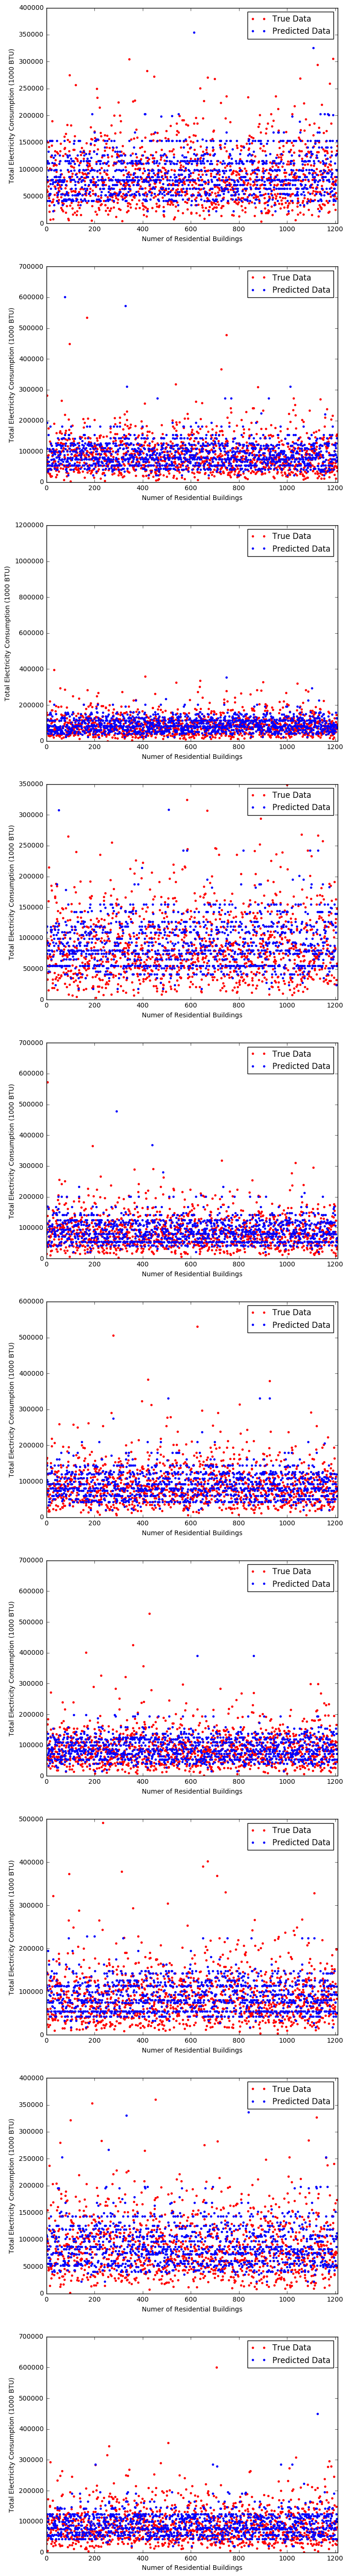

In [151]:
X1 = X.as_matrix()
Y1 = Y.as_matrix()

kf = KFold(n_splits=10,shuffle=False,random_state=None)
sum1 = []
i = 0
fig = plt.figure(figsize=(8,70))
for train, test in kf.split(X1):
    X_train = X1[train]
    X_test = X1[test]
    Y_train = Y1[train]
    Y_test = Y1[test]
    regr_1 = DecisionTreeRegressor(max_depth=7)
    regr_1.fit(X_train, Y_train)
    sum1.append(regr_1.score(X_test,Y_test))
    plt.subplot(10,1,i+1)
    plt.plot(Y_test,'.',c='r',label='True Data')
    plt.plot(regr_1.predict(X_test),'.',c='b',label='Predicted Data')
    plt.xlim(0,1210)
    plt.ylabel('Total Electricity Consumption (1000 BTU)')
    plt.xlabel('Numer of Residential Buildings')
    plt.legend()
    plt.savefig('99.png')
    i = i+1
sum1 = np.array(sum1)
print(sum1)
print(sum1.mean())

0.987371774421


(0, 12100)

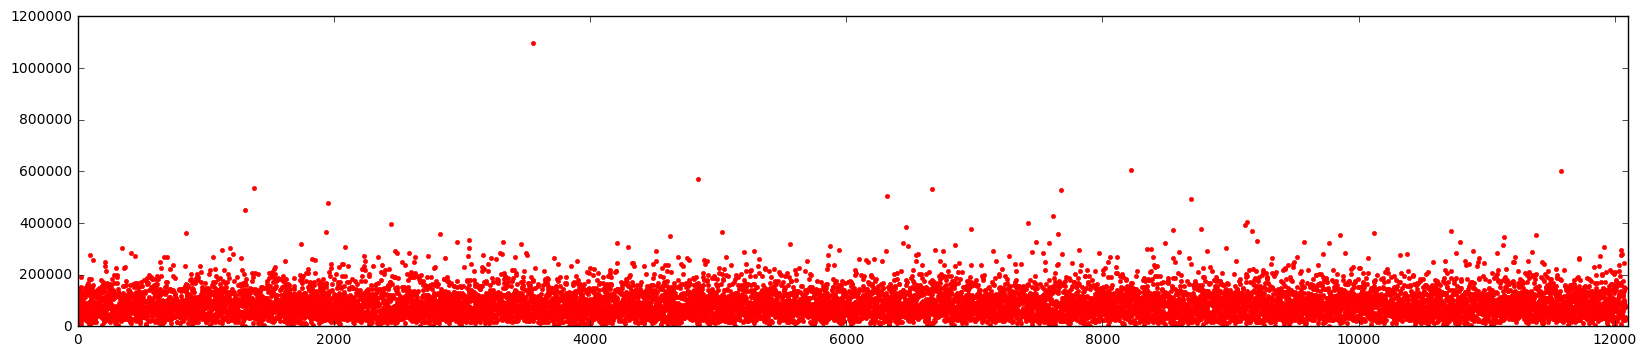

In [152]:
###### Select by hand ########
selection2=[3,26,33,34,460,600,608,826,827,828]
new = pd.DataFrame()
Y = data[data.columns[906]]
Y = pd.DataFrame(Y)
for i in selection2:
    new[data.columns[i]] = data[data.columns[i]]
X = new
reg1 = tree.DecisionTreeRegressor()
reg1.fit(X,Y)
print(reg1.score(X,Y))

fig1 = plt.figure(figsize=(20,4))
plt.plot(Y,'.',c='r')
plt.xlim(0,12100)

[ 0.36739031  0.31843039  0.32467625  0.3825026   0.41423312  0.37781657
  0.36939824  0.39436142  0.28747249  0.30829111]
0.354457249117


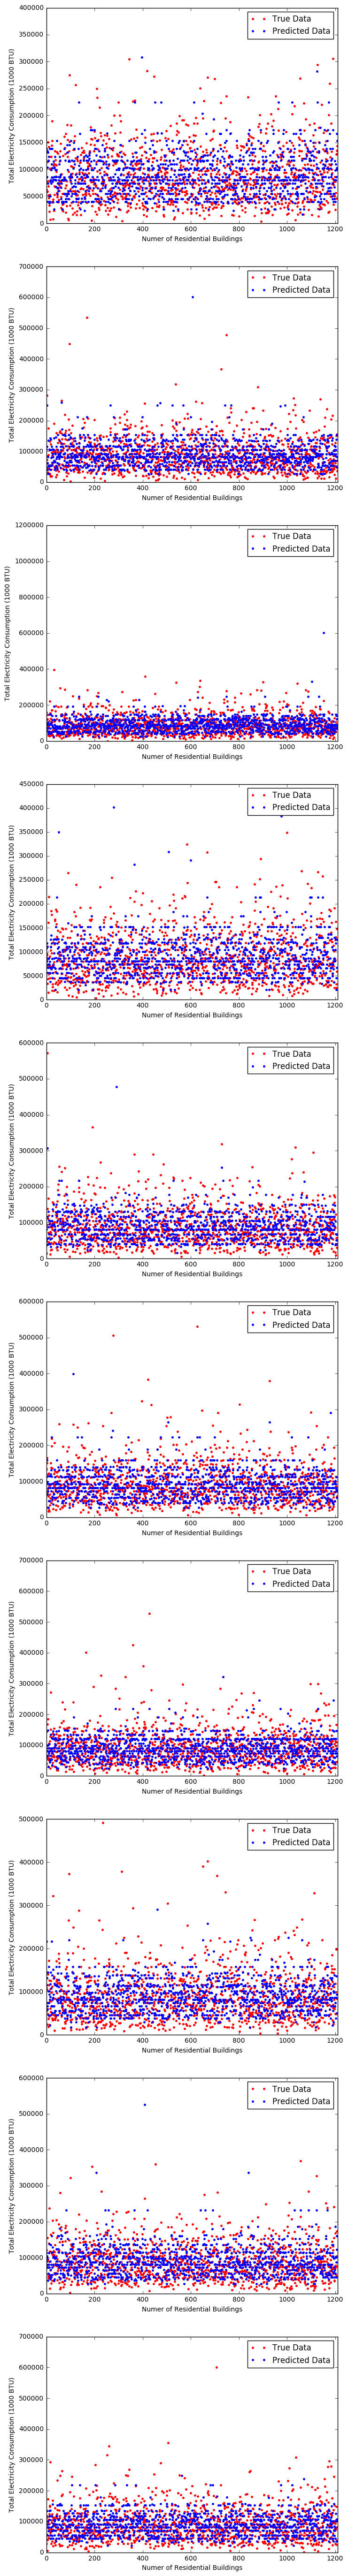

In [153]:
X1 = X.as_matrix()
Y1 = Y.as_matrix()

kf = KFold(n_splits=10,shuffle=False,random_state=None)
sum1 = []
i = 0
fig = plt.figure(figsize=(8,70))
for train, test in kf.split(X1):
    X_train = X1[train]
    X_test = X1[test]
    Y_train = Y1[train]
    Y_test = Y1[test]
    regr_1 = DecisionTreeRegressor(max_depth=7)
    regr_1.fit(X_train, Y_train)
    sum1.append(regr_1.score(X_test,Y_test))
    plt.subplot(10,1,i+1)
    plt.plot(Y_test,'.',c='r',label='True Data')
    plt.plot(regr_1.predict(X_test),'.',c='b',label='Predicted Data')
    plt.xlim(0,1210)
    plt.ylabel('Total Electricity Consumption (1000 BTU)')
    plt.xlabel('Numer of Residential Buildings')
    plt.legend()
    plt.savefig('999.png')
    i = i+1
sum1 = np.array(sum1)
print(sum1)
print(sum1.mean())

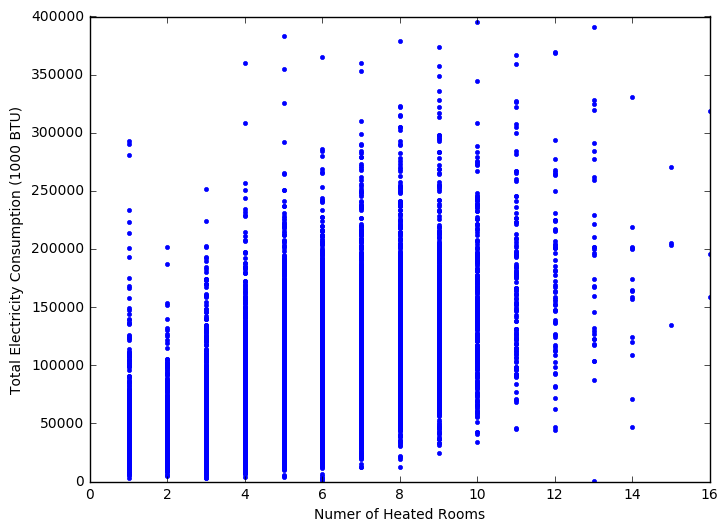

In [154]:
###### Single Feature Analysis: Heatroom #####
new
fig = plt.figure(figsize=(8,6))
plt.plot(new.HEATROOM,Y.TOTALBTU,'.')
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Numer of Heated Rooms')
plt.ylim(0,400000)
plt.xlim(0,16)
plt.savefig('Heatroom.png')

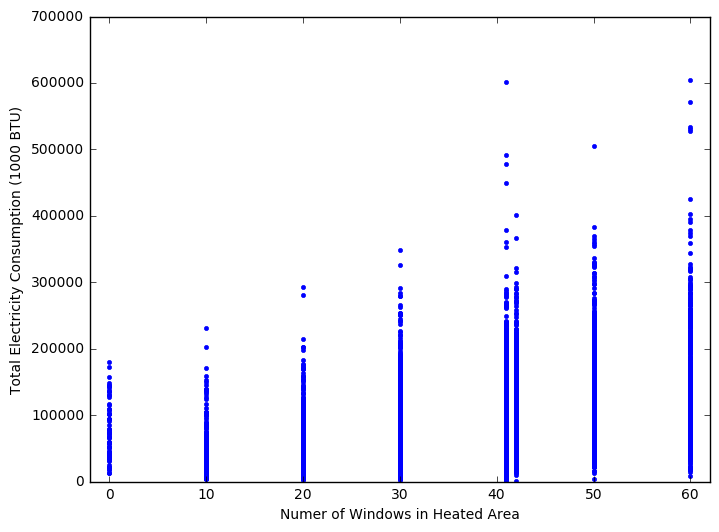

In [155]:
##### Single Feature Analysis: Numer of Windows in Heated Area #####
fig = plt.figure(figsize=(8,6))
plt.plot(new.WINDOWS,Y.TOTALBTU,'.')
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Numer of Windows in Heated Area')
plt.ylim(0,700000)
plt.xlim(-2,62)
plt.savefig('Windows.png')

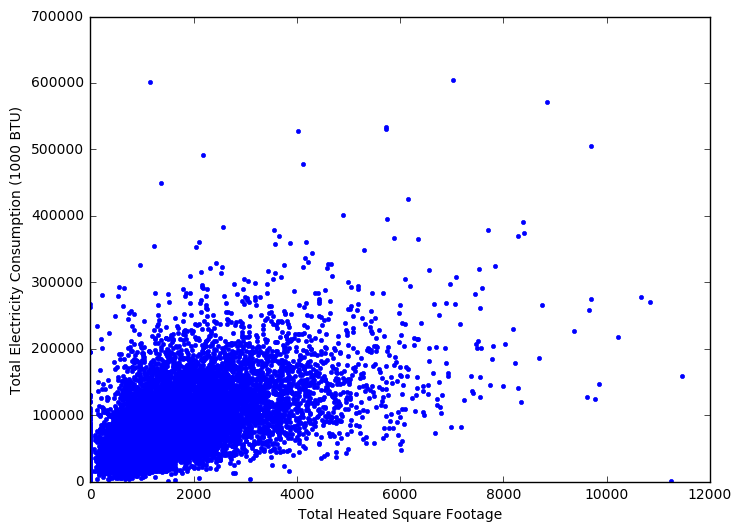

In [156]:
##### Single Feature Analysis: Total Heated Squre Footage #####
fig = plt.figure(figsize=(8,6))
plt.plot(new.TOTHSQFT,Y.TOTALBTU,'.')
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Total Heated Square Footage')
plt.ylim(0,700000)
plt.xlim(-10,12000)
plt.savefig('Square Footage.png')

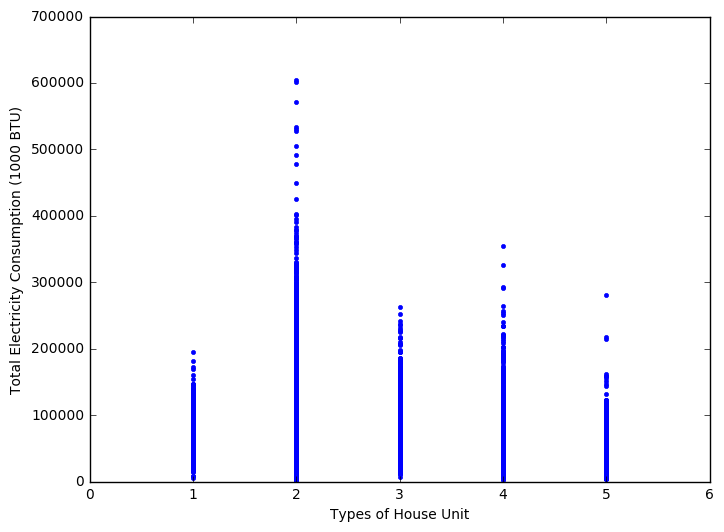

In [157]:
##### Single Feature Analysis: Types of House Unit #####
fig = plt.figure(figsize=(8,6))
plt.plot(new.TYPEHUQ,Y.TOTALBTU,'.')
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Types of House Unit')
plt.ylim(0,700000)
plt.xlim(0,6)
plt.savefig('Types of House Unit.png')

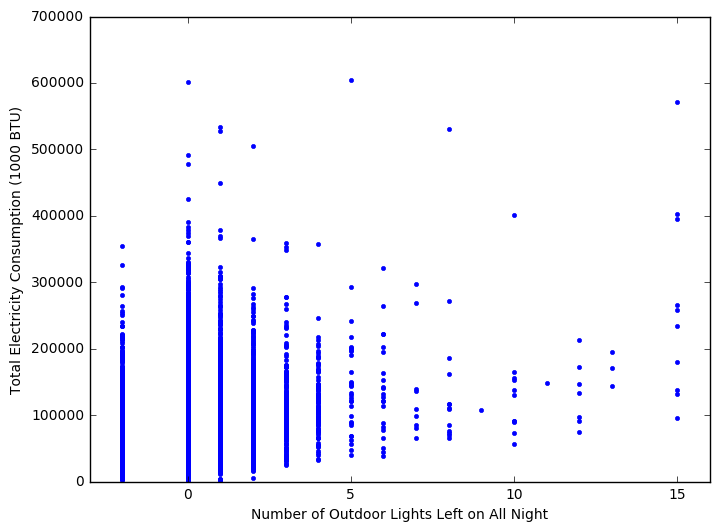

In [158]:
##### Single Feature Analysis: Number of Outdoor Lights Left on All Night #####
fig = plt.figure(figsize=(8,6))
plt.plot(new.NOUTLGTNT,Y.TOTALBTU,'.')
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Number of Outdoor Lights Left on All Night')
plt.ylim(0,700000)
plt.xlim(-3,16)
plt.savefig('Outdoor Lights.png')

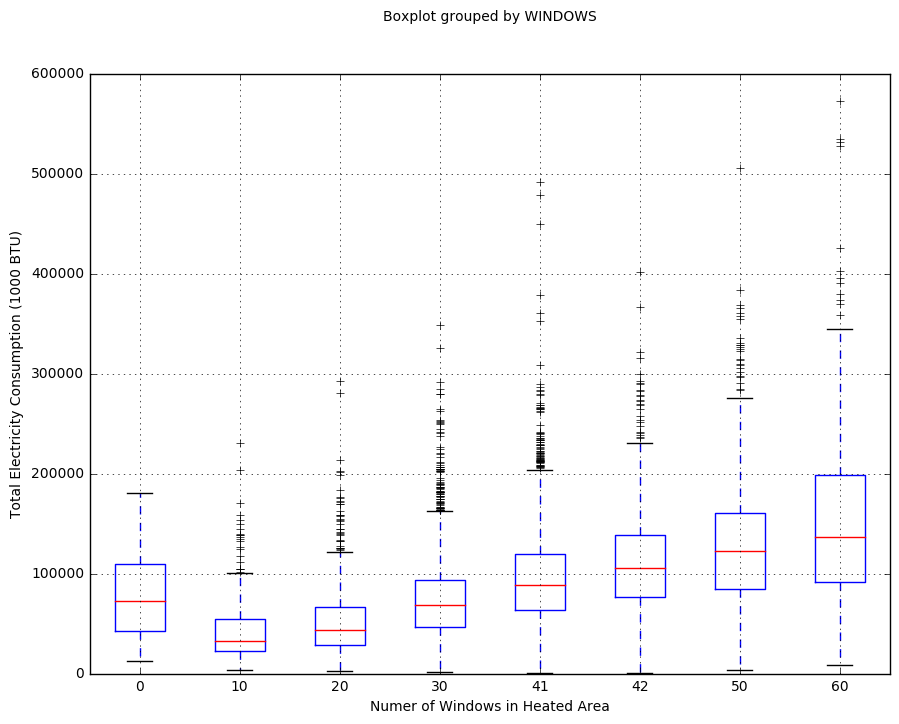

In [159]:
###### Single Feature Analysis: Windows #####
new1 = new
new1['VALUE'] = Y.TOTALBTU
new1.boxplot(column='VALUE',by='WINDOWS',return_type='axes',figsize=(10,8))
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Numer of Windows in Heated Area')
plt.ylim(0,600000)
plt.title('')
plt.savefig('Windows1.png')

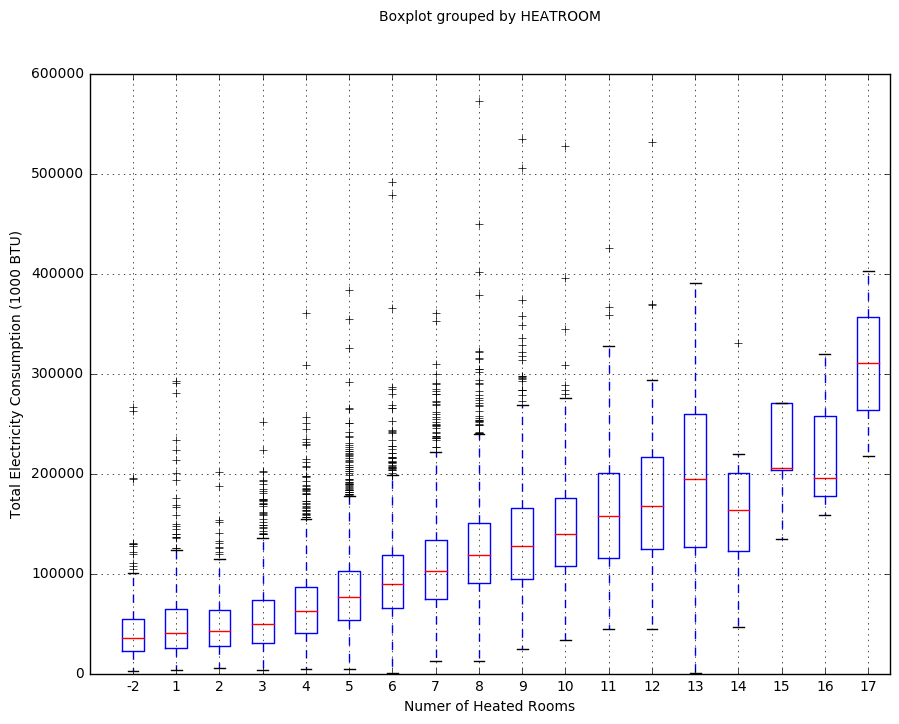

In [160]:
###### Single Feature Analysis: HEAT ROOM #####
new1.boxplot(column='VALUE',by='HEATROOM',return_type='axes',figsize=(10,8))
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Numer of Heated Rooms')
plt.title('')
plt.xlim(0,18.5)
plt.ylim(0,600000)
plt.savefig('Heatroom1.png')

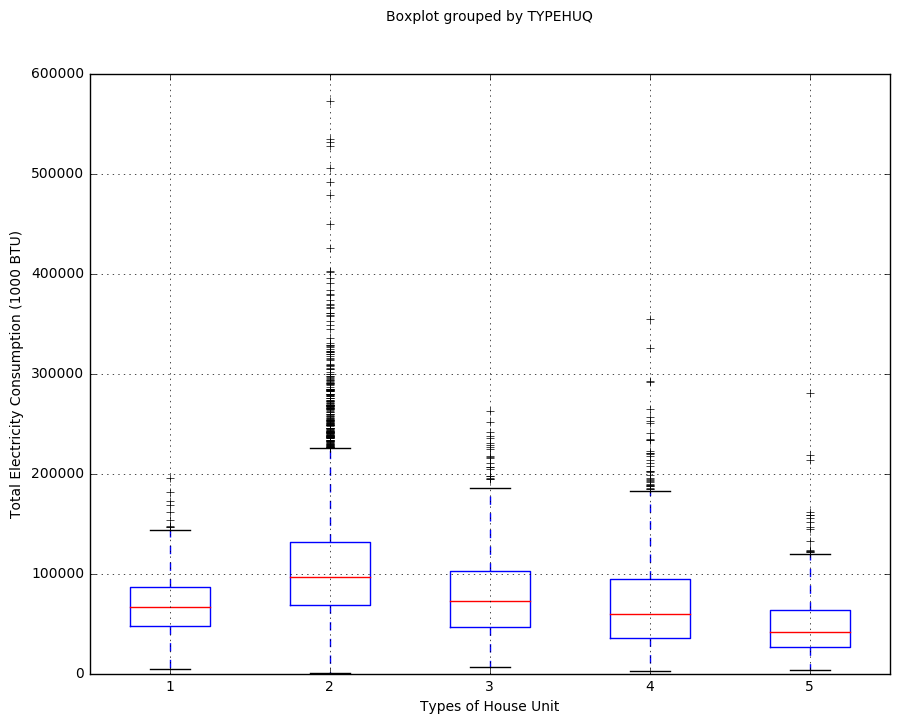

In [161]:
##### Single Feature Analysis: Types of House Unit #####
new1.boxplot(column='VALUE',by='TYPEHUQ',return_type='axes',figsize=(10,8))
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Types of House Unit')
plt.title('')
plt.ylim(0,600000)
plt.savefig('Types of House Unit1.png')

,TYPEHUQ,NAPTFLRS,TOTROOMS,CELLAR,HEATROOM,NOUTLGTNT,WINDOWS,TOTSQFT,TOTSQFT_EN,TOTHSQFT,VALUE
0,2,-2,9,1,9,0,41,5075,4675,3958,63006
1,2,-2,4,0,4,0,41,3136,2736,2736,103460
2,5,1,2,-2,2,-2,20,528,528,528,58716
3,2,-2,7,0,7,0,41,2023,1623,1623,76401
4,3,-2,5,1,5,0,30,1912,1912,1274,59809
5,2,-2,6,1,6,1,30,3485,3485,3485,114350
6,2,-2,7,1,7,2,50,2654,2654,2296,150726
7,2,-2,6,0,6,0,20,2352,1952,1952,78230
8,3,-2,7,1,7,0,42,1635,1635,1117,52677
9,2,-2,7,1,7,0,41,2390,2390,1365,69166


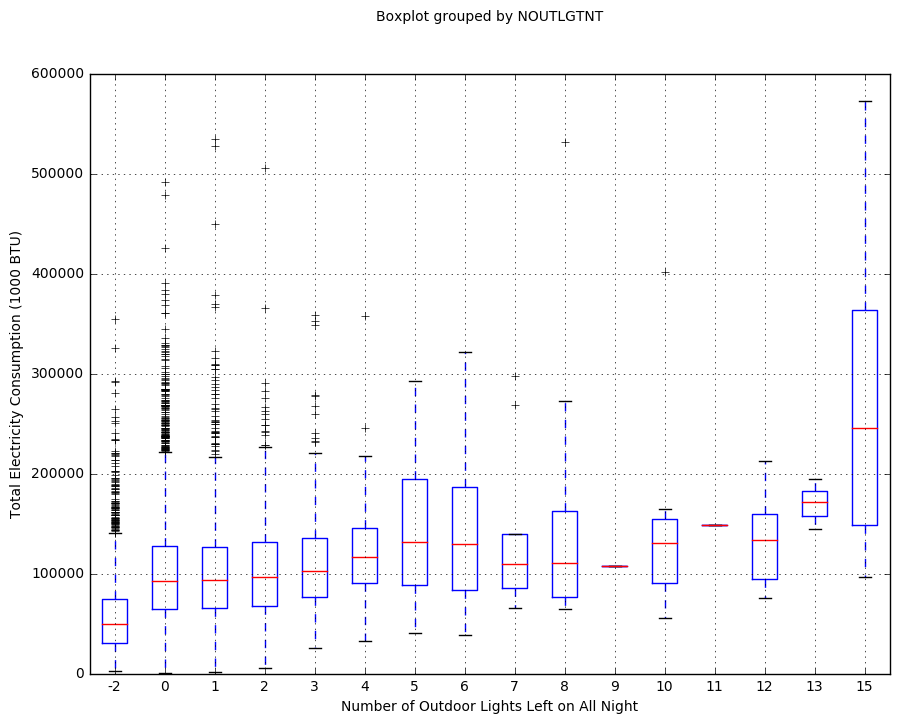

In [162]:
##### Single Feature Analysis: Number of Outdoor Lights Left on All Night #####
new1.boxplot(column='VALUE',by='NOUTLGTNT',return_type='axes',figsize=(10,8))
plt.ylabel('Total Electricity Consumption (1000 BTU)')
plt.xlabel('Number of Outdoor Lights Left on All Night')
plt.ylim(0,600000)
plt.title('')
plt.savefig('Outdoor Lights1.png')
new1

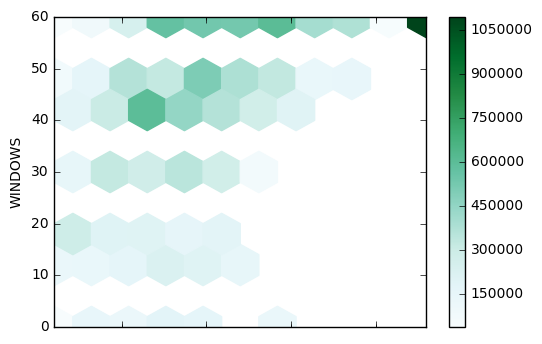

In [163]:
import matplotlib.cm as cm
import matplotlib.colors as col
new2 = pd.DataFrame()
new2['TOTROOMS']=new.TOTROOMS
new2['HEATROOM']=new.HEATROOM
new2['WINDOWS']=new.WINDOWS
new2['VALUE']=new1.VALUE
fig = plt.figure(figsize=(10,6))
new2.plot.hexbin(x='TOTROOMS', y='WINDOWS', C='VALUE',reduce_C_function=np.max,gridsize=10)